### Import Necessary Feature 🚲

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

### Reading Dataset ⚙️

In [ ]:
df = pd.read_csv("customer_credit_loan (1).csv")

df.head()

df = df.drop("Maximum Open Credit", axis = 1)

### Describing Dataset 💪


#### Statistic Description of the DF

In [ ]:
# Size of DF

rows, columns = df.shape
print("Banyaknya baris pada dataset: ", rows)
print("Banyaknya kolom pada dataset: ", columns)

Banyaknya baris pada dataset:  85296
Banyaknya kolom pada dataset:  17


In [ ]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,8.529600e+04,85296.000000,8.529600e+04,85296.000000,85296.000000,85296.000000,85296.000000,8.529600e+04,85296.000000,85296.000000
mean,1.308123e+07,1119.072738,1.377063e+06,18405.787031,18.238954,11.121461,0.165098,2.942867e+05,0.115613,0.028598
std,3.331783e+07,1392.969454,9.900590e+05,12155.576841,7.022574,4.991050,0.477663,3.752491e+05,0.347745,0.255848
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,1.802680e+05,715.000000,9.386000e+05,10163.432500,13.500000,8.000000,0.000000,1.129360e+05,0.000000,0.000000
50%,3.142260e+05,737.000000,1.378277e+06,16142.590000,17.000000,10.000000,0.000000,2.096650e+05,0.000000,0.000000
75%,5.327960e+05,1076.456089,1.496079e+06,23941.377500,21.700000,14.000000,0.000000,3.675170e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,76.000000,15.000000,3.287897e+07,7.000000,15.000000


#### Correlation of Data

##### Pearson R

<Axes: >

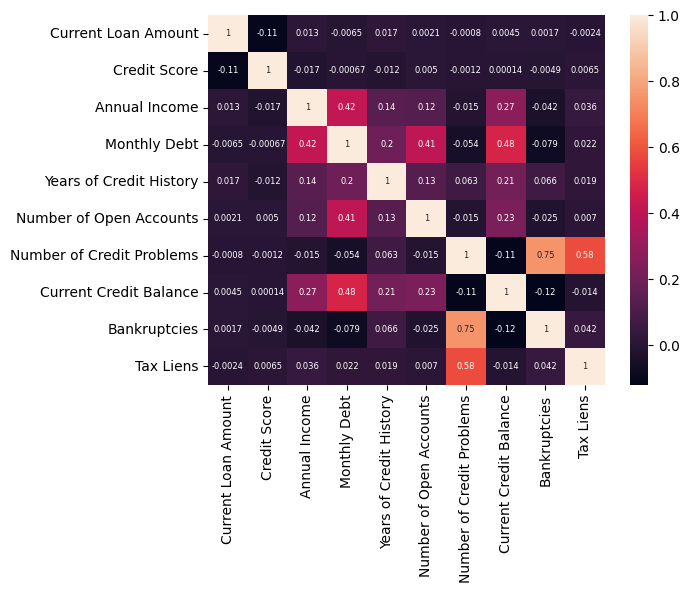

In [ ]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot= True, annot_kws={"fontsize":6})

##### Spearman Rho

<Axes: >

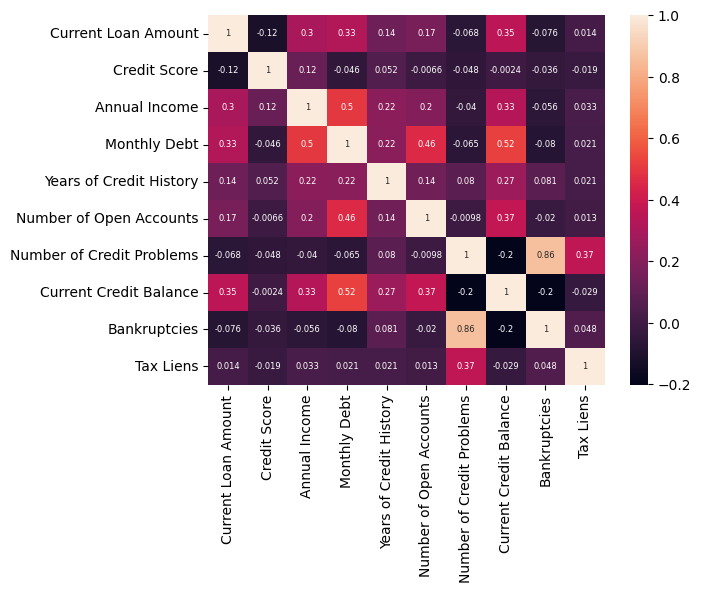

In [ ]:
pearson_r = df.corr(method = "spearman")

sns.heatmap(pearson_r, annot= True, annot_kws={"fontsize":6})

### B - Pertanyaan 1

#### Feature Engineering

- Drop duplicated data
- Outlier handling
- Check missing value
- Encoding
- Splitting data (train, validation, test)
- Handle imbalance data

In [ ]:
df_loan = df.copy()

df_numerical = df_loan.select_dtypes(include=['float64'])
df_categorical = df_loan.select_dtypes(exclude=['float64'])

print('Ada', df_numerical.shape[1], 'data numerikal')
print('Ada', df_categorical.shape[1], 'data kategorikal')

col_numerical = list(df_numerical.columns)
col_categorical = list(df_categorical.columns)

print(df_loan.dtypes)

Ada 10 data numerikal
Ada 7 data kategorikal
Loan ID                       object
Customer ID                   object
Current Loan Amount          float64
Term                          object
Credit Score                 float64
Annual Income                float64
Years in current job          object
Home Ownership                object
Purpose                       object
Monthly Debt                 float64
Years of Credit History      float64
Number of Open Accounts      float64
Number of Credit Problems    float64
Current Credit Balance       float64
Bankruptcies                 float64
Tax Liens                    float64
Loan Status                   object
dtype: object


Duplicated, outlier, and missing values

Tidak ditemukan missing value pada dataset
Duplicates value on dataset: 0
Outlier pada tiap atribut:
Annual Income                 6056
Bankruptcies                  9417
Credit Score                  4321
Current Credit Balance        4427
Current Loan Amount          10928
Customer ID                      0
Home Ownership                   0
Loan ID                          0
Loan Status                      0
Monthly Debt                  2860
Number of Credit Problems    11709
Number of Open Accounts       1920
Purpose                          0
Tax Liens                     1612
Term                             0
Years in current job             0
Years of Credit History       2654
dtype: int64
{'Annual Income': 6056, 'Bankruptcies': 9417, 'Credit Score': 4321, 'Current Credit Balance': 4427, 'Current Loan Amount': 10928, 'Customer ID': 0, 'Home Ownership': 0, 'Loan ID': 0, 'Loan Status': 0, 'Monthly Debt': 2860, 'Number of Credit Problems': 11709, 'Number of Open Accounts': 1920,

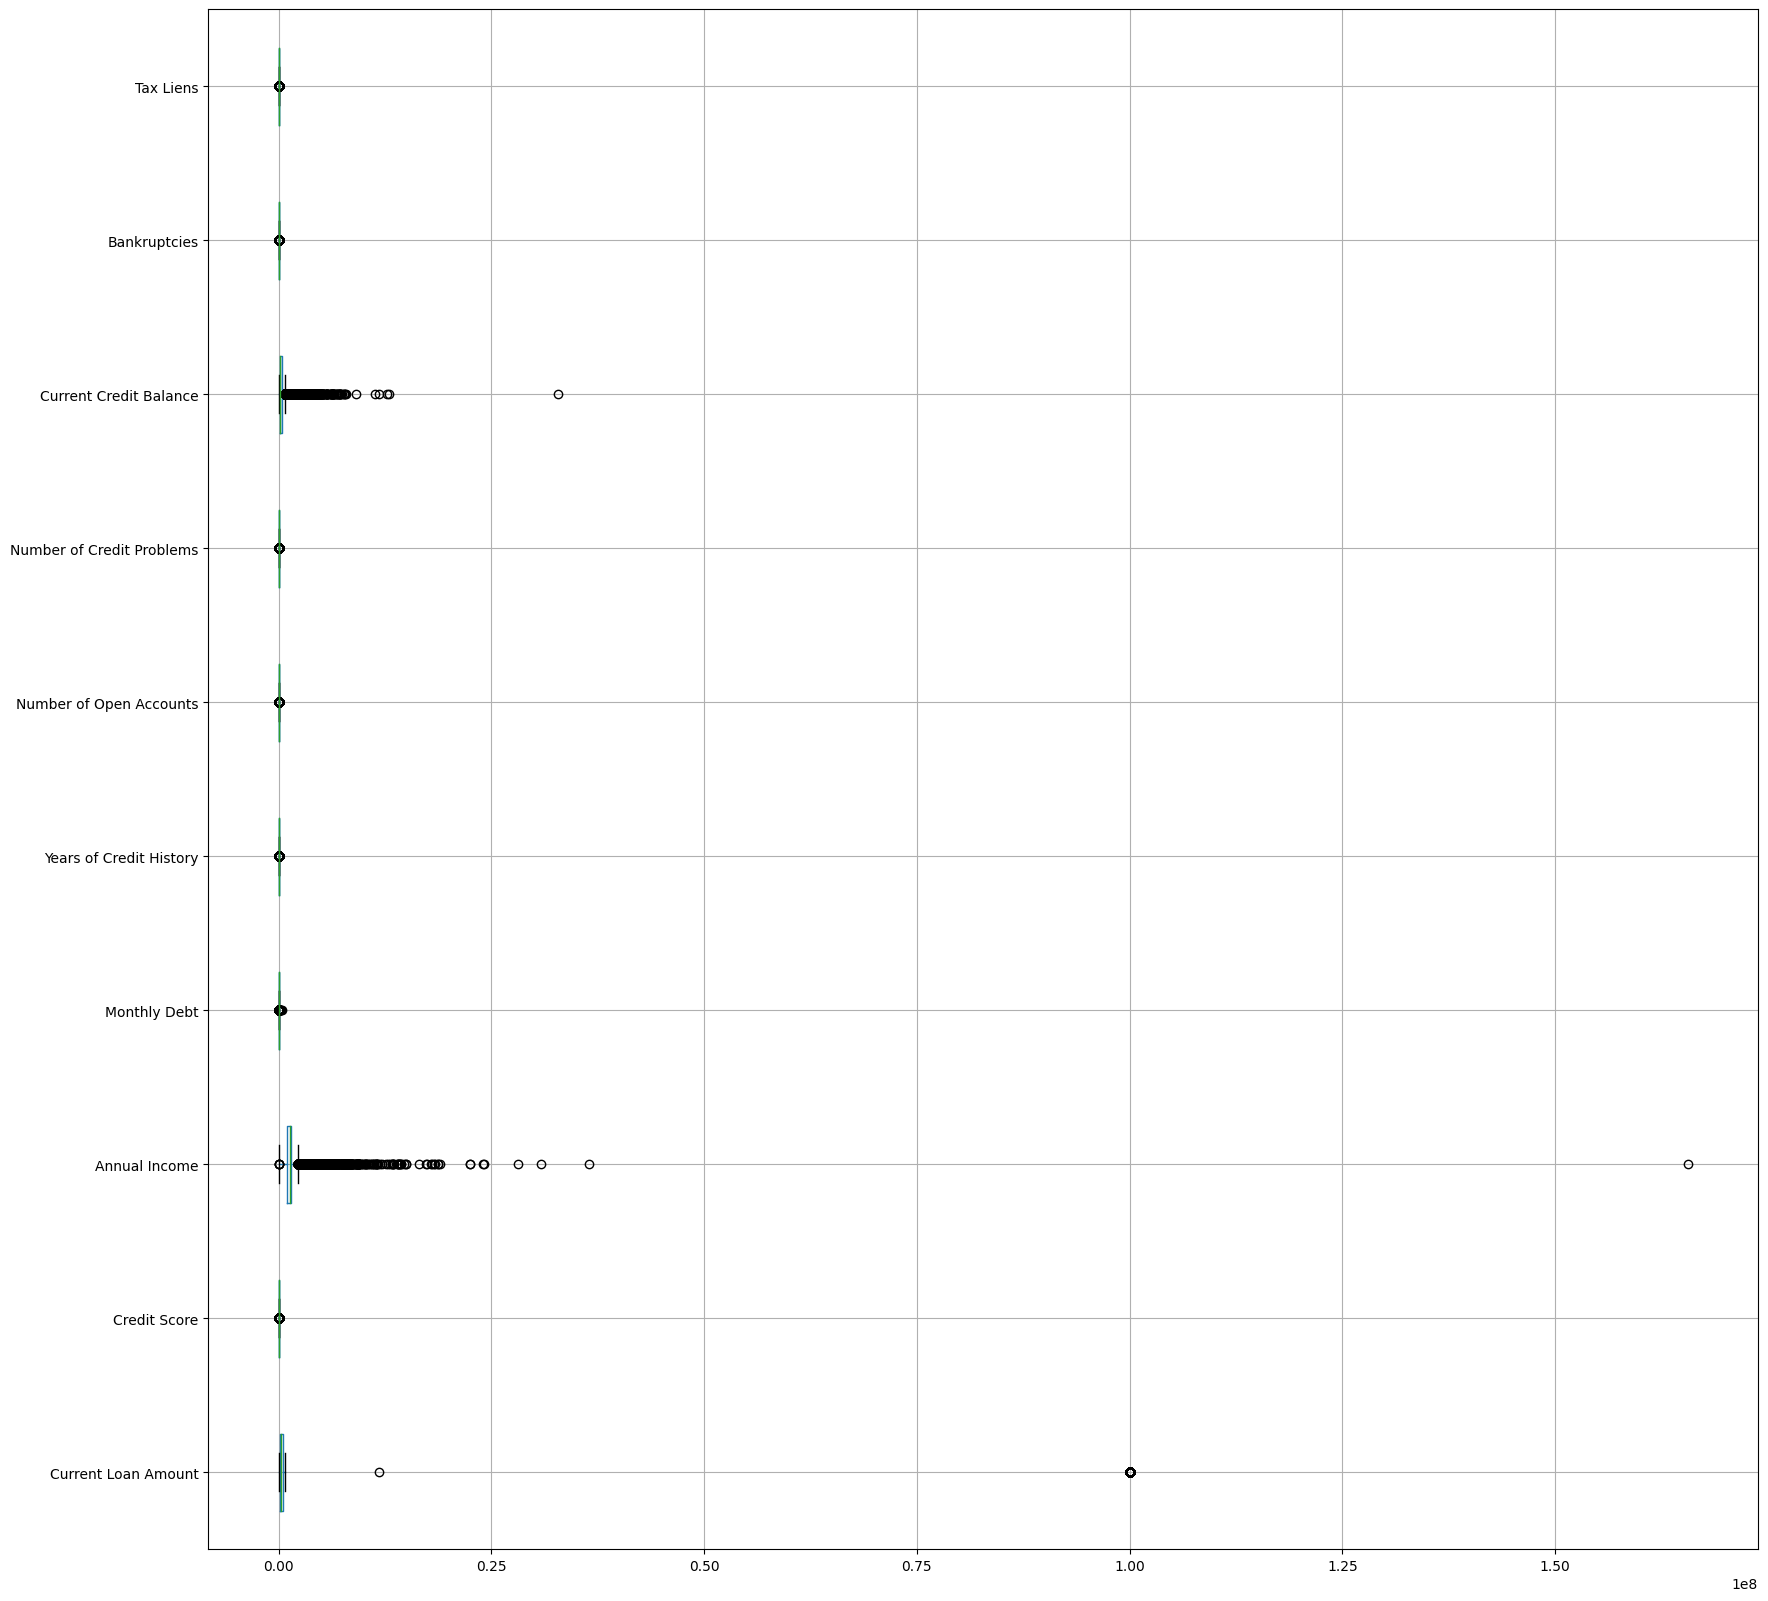

In [ ]:
from typing import Literal

# Missing value:

def check_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na / len(df)
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])

    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")
    else:
        print(missing_data[missing_data['Total'] > 0])

# Outlier related

def check_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (df < lower_limit) | (df > upper_limit)
    print ("Outlier pada tiap atribut:")
    print(outliers.sum())

    return outliers

def determine_outlier_thresholds_iqr(dataframe, col_name, th1=0.25, th3=0.75):
    quartile1 = dataframe[col_name].quantile(th1)
    quartile3 = dataframe[col_name].quantile(th3)
    iqr = quartile3 - quartile1
    upper_limit = quartile3 + 1.5 * iqr
    lower_limit = quartile1 - 1.5 * iqr
    return lower_limit, upper_limit

def check_outliers_iqr(dataframe, col_name):
    lower_limit, upper_limit = determine_outlier_thresholds_iqr(dataframe, col_name)
    if dataframe[(dataframe[col_name] > upper_limit) | (dataframe[col_name] < lower_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds_iqr(dataframe, cols, target_value, col_categorical = [], replace=False):
    from tabulate import tabulate
    data = []
    for col_name in cols:
        if col_name != target_value and (col_name not in col_categorical):
            outliers_ = check_outliers_iqr(dataframe,col_name)
            count = None
            lower_limit, upper_limit = determine_outlier_thresholds_iqr(dataframe, col_name)
            if outliers_:
                count = dataframe[(dataframe[col_name] > upper_limit) | (dataframe[col_name] < lower_limit)][col_name].count()
                if replace:
                    if lower_limit < 0:
                        dataframe.loc[(dataframe[col_name] > upper_limit), col_name] = upper_limit
                    else:
                        dataframe.loc[(dataframe[col_name] < lower_limit), col_name] = lower_limit
                        dataframe.loc[(dataframe[col_name] > upper_limit), col_name] = upper_limit
            outliers_status = check_outliers_iqr(dataframe, col_name)
            data.append([outliers_, outliers_status, count, col_name, lower_limit, upper_limit ])
    table = tabulate(data, headers=['Outliers (Previously)', 'Outliers', 'Count', 'Column', 'Lower Limit', 'Upper Limit'], tablefmt='rst', numalign='right')
    print("Removing Outliers using IQR")
    print(table)


def determine_outlier_thresholds_std(dataframe, col_name):
    upper_boundary = dataframe[col_name].mean() + 3 * dataframe[col_name].std()
    lower_boundary = dataframe[col_name].mean() - 3 * dataframe[col_name].std()
    return lower_boundary, upper_boundary

def check_outliers_std(dataframe, col_name):
    lower_boundary, upper_boundary = determine_outlier_thresholds_std(dataframe, col_name)
    if dataframe[(dataframe[col_name] > upper_boundary) | (dataframe[col_name] < lower_boundary)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds_std(dataframe, cols, target_value, col_categorical = [], replace=False):
    from tabulate import tabulate
    data = []
    for col_name in cols:
        if col_name != target_value and col_name not in col_categorical:
            outliers_ = check_outliers_std(dataframe, col_name)
            count = None
            lower_limit, upper_limit = determine_outlier_thresholds_std(dataframe, col_name)
            if outliers_:
                count = dataframe[(dataframe[col_name] > upper_limit) | (dataframe[col_name] < lower_limit)][col_name].count()
                if replace:
                    if lower_limit < 0:
                        dataframe.loc[(dataframe[col_name] > upper_limit), col_name] = upper_limit
                    else:
                        dataframe.loc[(dataframe[col_name] < lower_limit), col_name] = lower_limit
                        dataframe.loc[(dataframe[col_name] > upper_limit), col_name] = upper_limit
            outliers_status = check_outliers_std(dataframe, col_name)
            data.append([outliers_, outliers_status,count, col_name, lower_limit, upper_limit])
    table = tabulate(data, headers=['Outlier (Previously)','Outliers','Count', 'Column','Lower Limit', 'Upper Limit'], tablefmt='rst', numalign='right')
    print("Removing Outliers using 3 Standard Deviation")
    print(table)

def remove_outlier(df, outlier_type: Literal['iqr', 'std', "nah"], target_value, col_categorical):
  print(dict(check_outlier(df).sum()))
  print("Boxplot Old")
  df.boxplot(vert=False, figsize=(20,20))
  if(outlier_type == "iqr"):
    replace_with_thresholds_iqr(df, df.columns, target_value, col_categorical, replace=True)
  elif(outlier_type == "std"):
    replace_with_thresholds_std(df, df.columns, target_value, col_categorical, replace = True)
  else:
    pass

def preprocess(df, outlier_type, target_value, col_categorical):
  check_null(df)

  print("Duplicates value on dataset:", df.duplicated().sum())

  # df.drop_duplicates(inplace=True)

  # print("Duplicates value on dataset:", df.duplicated().sum()) # 0 now

  remove_outlier(df, outlier_type, target_value, col_categorical)

preprocess(df_loan, "nah", "Loan Status", col_categorical)

New Boxplot


<Axes: >

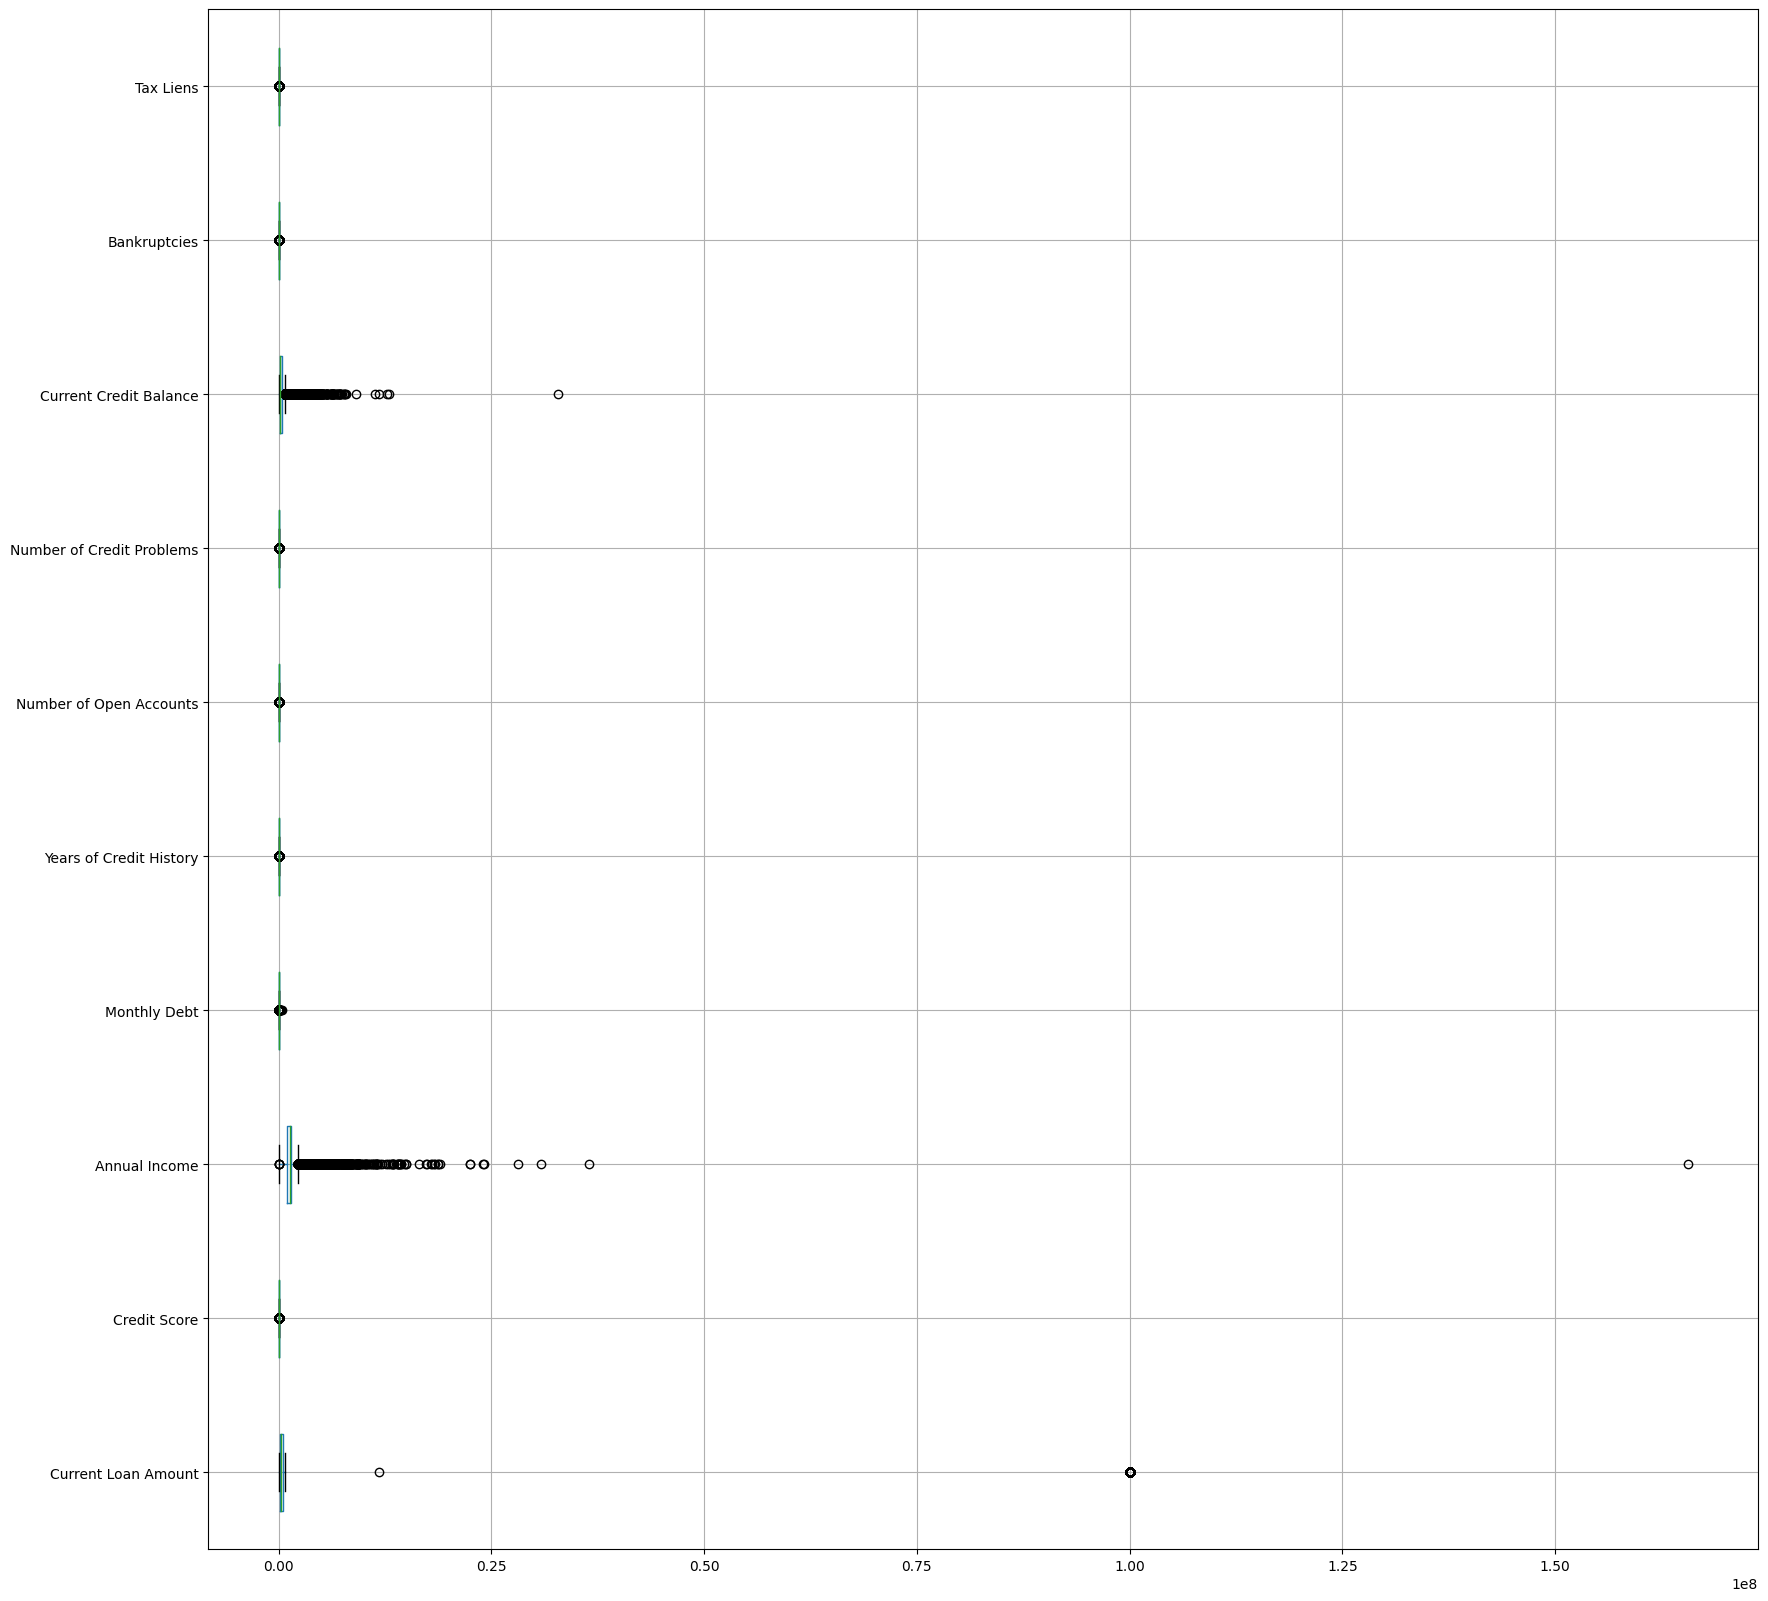

In [ ]:
# Boxplot after removing outlier

print("New Boxplot")
df_loan.boxplot(vert=False, figsize=(20,20))

Encoding on categorical column

In [ ]:
# Label encoding (encode target terlebih dahulu menjadi numerik dengan natural progression)
encoders = dict()

for col_name in col_categorical:
    series = df_loan[col_name]
    label_encoder = LabelEncoder()
    df_loan[col_name] = pd.Series(
        label_encoder.fit_transform(series),
        index=series.index
    )
    encoders[col_name] = label_encoder

In [ ]:
df_loan[col_categorical].head()

,Loan ID,Customer ID,Term,Years in current job,Home Ownership,Purpose,Loan Status
0,70740,9149,1,1,1,3,1
1,40,70756,1,1,1,1,1
2,44575,45651,0,10,2,3,1
3,61977,42703,0,7,1,3,1
4,42910,4051,0,1,1,3,1


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from collections import Counter
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from numpy import where
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score

Counter({1: 63789, 0: 21507})


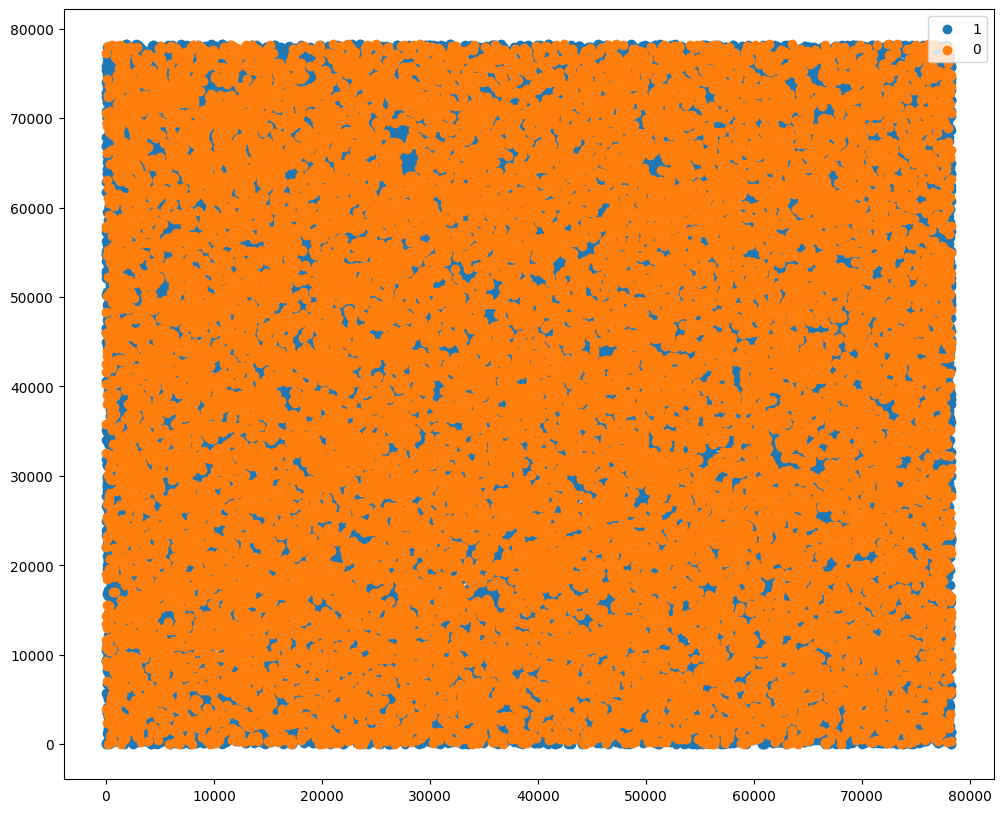

In [ ]:
# Classification model
X = df_loan.drop('Loan Status', axis = 1)
y = df_loan['Loan Status']

X1 = X.to_numpy()
y1 = y.to_numpy()

counter_y = Counter(y1)
print(counter_y)

pyplot.figure(figsize=(12, 10))

for label, _ in counter_y.items():
    row_ix = where(y1 == label)[0]
    pyplot.scatter(X1[row_ix, 0], X1[row_ix, 1], label=str(label))
    pyplot.legend()

Counter({1: 55928, 0: 21507})


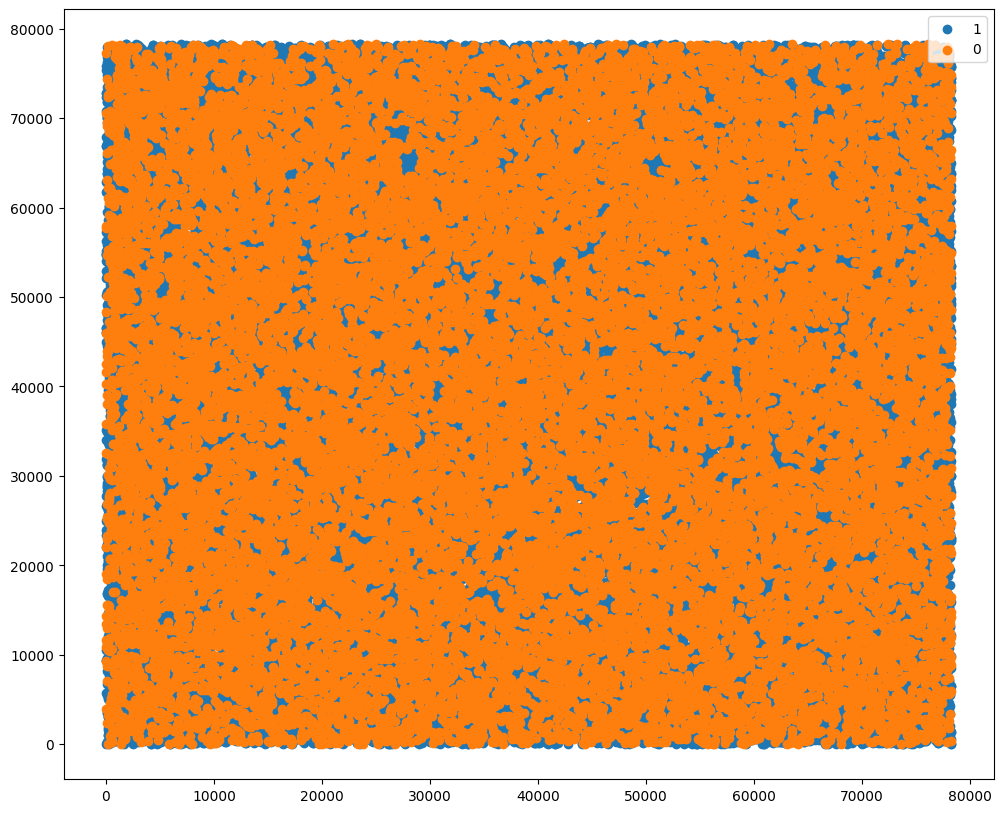

In [ ]:
# Handle imabalance data (using tomek link)

tomek = TomekLinks()

X_tomek, y_tomek = tomek.fit_resample(X1, y1)

counter_y_tomek = Counter(y_tomek)
print(counter_y_tomek)

pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_tomek.items():
  row_ix = where(y_tomek == label)[0]
  pyplot.scatter(X_tomek[row_ix, 0], X_tomek[row_ix, 1], label=str(label))
  pyplot.legend()
pyplot.show()

In [ ]:
# Splitting training and testing

X_train, X_test, y_train, y_test = train_test_split(X_tomek, y_tomek,test_size = 69, stratify=y_tomek)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
y_train = pd.Series(y_train, name="Loan Status")

Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def scale_train_and_test(X_train, X_test, numerical_column):
    """ Ini adalah approach yang dilakukan berdasarkan hint diatas (Standarisasi dilatih terlebihi dahulu pada data training),
      lalu berdasarkan hasilnya standarisasi data training dan testnya.
      Note: tidak dilakukan standarisasi terhadap kolom yang sebelumnya kategorikal
    """
    scaler = MinMaxScaler()

    scaler.fit(X_train[numerical_column])

    X_train_scaled = X_train.copy()
    X_train_scaled[numerical_column] = scaler.transform(X_train[numerical_column])

    X_test_scaled = X_test.copy()
    X_test_scaled[numerical_column] = scaler.transform(X_test[numerical_column])

    return X_train_scaled, X_test_scaled, scaler

# There are no categorical column to be encoded here.
X_train_scaled, X_test_scaled, temp_scaler = scale_train_and_test(X_train, X_test, col_numerical)
X_train_scaled

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
0,17022.0,74938.0,0.003194,1.0,0.070968,0.007866,7.0,3.0,3.0,0.087776,0.373692,0.197368,0.000000,0.013342,0.000000,0.0
1,15641.0,61783.0,0.002049,1.0,0.019495,0.003670,9.0,1.0,11.0,0.028636,0.198804,0.118421,0.066667,0.002402,0.142857,0.0
2,71112.0,22671.0,0.005368,0.0,0.070968,0.007866,5.0,1.0,5.0,0.051941,0.130045,0.131579,0.000000,0.005130,0.000000,0.0
3,67763.0,78007.0,0.001305,1.0,0.070968,0.007866,5.0,1.0,3.0,0.059881,0.240658,0.197368,0.000000,0.021859,0.000000,0.0
4,38482.0,32442.0,0.005301,0.0,0.070968,0.007866,1.0,3.0,3.0,0.053453,0.209268,0.289474,0.000000,0.022216,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77361,73074.0,26440.0,0.000980,1.0,0.070968,0.007866,6.0,3.0,11.0,0.005708,0.136024,0.092105,0.000000,0.002145,0.000000,0.0
77362,70667.0,35518.0,0.004398,0.0,0.018051,0.006309,1.0,1.0,3.0,0.031712,0.222720,0.078947,0.000000,0.004145,0.000000,0.0
77363,26025.0,48732.0,0.002821,1.0,0.023971,0.013411,1.0,1.0,3.0,0.065844,0.300448,0.157895,0.000000,0.008095,0.000000,0.0
77364,27608.0,42894.0,0.003055,1.0,0.070968,0.007866,1.0,2.0,5.0,0.022195,0.188341,0.223684,0.000000,0.010076,0.000000,0.0


Buatlah beberapa model yang mungkin akan diperlukan, di antaranya: (dapat ditambah analisis lain yang
menurut kelompok Anda akan bermanfaat)


#### Metrics to evaluate regression/classification

In [ ]:
def evaluate_classifier_performance(prediction, y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print()
    print("Confusion Matrix")
    print()
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    print()

    print("Butuh informasi lebih lengkap? silakan simak di bawah ini : ")
    print('Accuracy Average:', accuracy_score(y_test, prediction))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

In [ ]:
rf_classifier = RandomForestClassifier(random_state=69)

# param_grid = {'criterion': ["gini", "entropy", "log_loss"],
#                'min_samples_split': [10, 20, 50],
#                'max_depth' : [5, 10, 12, 16, 18]}

# clf_rf_classifier = GridSearchCV(estimator= rf_classifier,
#                    param_grid=param_grid, cv= 5)
# print(clf_rf_classifier.best_params_)

rf_classifier.fit(X_train_scaled, y_train)

# Prediction for "Loan Status"

# Note: welp apparently its true that RF is not sensitive to outlier, so doesnt matter that much.
# Another note: feature scaling nor normalization is not really needed based on several inputs: https://forecastegy.com/posts/does-random-forest-need-feature-scaling-or-normalization/
predicted = rf_classifier.predict(X_test_scaled)
evaluate_classifier_performance(predicted, y_test)

# with normalization (for now i wont put it in, because its not needed right ??)
# Accuracy: 0.7951348182883939
# F1 Score: 0.623914975051892
# Recall Score: 0.6109268546689336
# Precision Score: 0.8134998895788074

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.62      0.26      0.37        19
           1       0.77      0.94      0.85        50

    accuracy                           0.75        69
   macro avg       0.70      0.60      0.61        69
weighted avg       0.73      0.75      0.72        69



Confusion Matrix



prediction,0,1
actual,,
0,5,14
1,3,47




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.7536231884057971
F1 Macro Average: 0.6086086086086087
F1 Micro Average: 0.7536231884057971
Precision Macro Average: 0.6977459016393442
Precision Micro Average: 0.7536231884057971
Recall Macro Average: 0.601578947368421
Recall Micro Average: 0.7536231884057971



#### Pencarian model untuk Loan Status

a. Buatlah model untuk mengklasifikasi ‘Loan Status’. Atribut apa saja yang perlu diperhatikan ketika
ingin menentukan 'Loan Status' customer?

Base Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB, BernoulliNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV

In [ ]:
model = {
    'random_forest': RandomForestClassifier(),
    'gaussian_nb': GaussianNB(),
    'multinomial_nb': MultinomialNB(),
    'bernoulli_nb': BernoulliNB(),
    'complement_nb': ComplementNB(),
    'logistic_reg': LogisticRegression(),
    'mlp': MLPClassifier(),
    'knn': KNeighborsClassifier()
}

In [ ]:
best_parameters = {
    'random_forest': {},
    'gaussian_nb': {},
    'multinomial_nb': {},
    'bernoulli_nb': {},
    'complement_nb': {},
    'logistic_reg': {},
    'mlp': {},
    'knn': {}
}

In [ ]:
parameters = {
    'random_forest': {
    },
    'gaussian_nb': {
    },
    'multinomial_nb': {
        'alpha':[0, 0.3, 0.5, 1],
    },
    'bernoulli_nb': {
        'alpha':[0, 0.3, 0.5, 1],
    },
    'complement_nb': {
        'alpha':[0, 0.3, 0.5, 1],
    },
    'logistic_reg': {
    },
    'mlp': {
        'hidden_layer_sizes': [(50,20), (50, 75, 20)],
        'learning_rate_init': [0.01, 0.1],
    },
    'knn': {
    }
}

In [ ]:
for x in model.keys():
  print("Model:", x)
  random_search = RandomizedSearchCV(model[x], parameters[x], n_iter=5, cv=5)
  random_search.fit(X_train_scaled, y_train)
  best_parameters[x] = random_search.best_params_

Model: random_forest
Model: gaussian_nb
Model: multinomial_nb
Model: bernoulli_nb
Model: complement_nb
Model: logistic_reg
Model: mlp
Model: knn


In [ ]:
model = {
    'random_forest': RandomForestClassifier(**best_parameters['random_forest']),
    'gaussian_nb': GaussianNB(**best_parameters['gaussian_nb']),
    'multinomial_nb': MultinomialNB(**best_parameters['multinomial_nb']),
    'bernoulli_nb': BernoulliNB(**best_parameters['bernoulli_nb']),
    'complement_nb': ComplementNB(**best_parameters['complement_nb']),
    'logistic_reg': LogisticRegression(**best_parameters['logistic_reg']),
    'mlp': MLPClassifier(**best_parameters['mlp']),
    'knn': KNeighborsClassifier(**best_parameters['knn'])
}

In [ ]:
# CV to reduce overfitting
def cross_validation(model, X, y, cv=5):
  kf = StratifiedKFold(cv)
  scores = []
  for train_idx, test_idx in kf.split(X, y):
      X_train, X_val = X.iloc[train_idx], X.iloc[test_idx]
      y_train, y_val = y.iloc[train_idx], y.iloc[test_idx]

      model.fit(X_train, y_train)
      predictions = model.predict(X_val)

      accuracy = accuracy_score(y_val, predictions)
      scores.append(accuracy)

  print(f"{model}:", scores)
  return np.mean(scores)

In [ ]:
for x in model.keys():
  result = cross_validation(model[x], X_train_scaled, y_train)
  print(f'{x}: {result}')

RandomForestClassifier(): [0.7807289647150059, 0.7774833581076714, 0.7792283332256188, 0.7780003877722484, 0.778323531312609]
random_forest: 0.7787529150266307
GaussianNB(): [0.7230838826418509, 0.7241000452400956, 0.7226782136625088, 0.7237122729916629, 0.7233245007432302]
gaussian_nb: 0.7233797830558697
MultinomialNB(alpha=0): [0.518030244280729, 0.5060427842047438, 0.5049440961675176, 0.49964454210560333, 0.5186453822788083]
multinomial_nb: 0.5094614098074804
BernoulliNB(alpha=0.5): [0.7214682693550472, 0.7224843275382925, 0.7222904414140762, 0.7224196988302204, 0.7222258127060041]
bernoulli_nb: 0.722177709968728
ComplementNB(alpha=0): [0.5119555383223472, 0.50410392296258, 0.50410392296258, 0.4984165966522329, 0.5151554320429135]
complement_nb: 0.5067470825885307
LogisticRegression(): [0.7222437637327129, 0.7222904414140762, 0.7222904414140762, 0.7222258127060041, 0.7222258127060041]
logistic_reg: 0.7222552543945747
MLPClassifier(hidden_layer_sizes=(50, 20), learning_rate_init=0.01

#### Feature Importance (which attribute matters)

                      Feature  Importance
15                  Tax Liens    0.002754
14               Bankruptcies    0.006361
12  Number of Credit Problems    0.008158
7              Home Ownership    0.011894
3                        Term    0.017310
8                     Purpose    0.020274
6        Years in current job    0.039996
11    Number of Open Accounts    0.055666
5               Annual Income    0.072123
10    Years of Credit History    0.080762
0                     Loan ID    0.084986
1                 Customer ID    0.085050
13     Current Credit Balance    0.085606
9                Monthly Debt    0.088074
2         Current Loan Amount    0.139736
4                Credit Score    0.201249


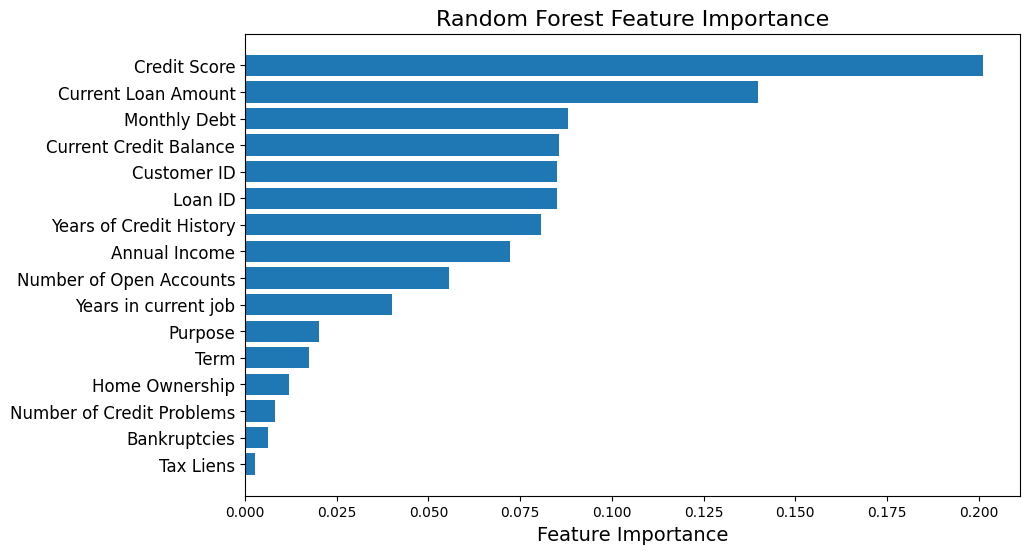

In [ ]:
feature_importances = model["random_forest"].feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

print(feature_importance_df)
# Plotting
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance_df)), feature_importance_df['Importance'], align='center')
plt.yticks(range(len(feature_importance_df)), feature_importance_df['Feature'], fontsize=12)
plt.xlabel('Feature Importance', fontsize=14)
plt.title('Random Forest Feature Importance', fontsize=16)
plt.show()

#### Prediction for Loan Status

In [ ]:
steps = [('over', TomekLinks()), ('model', model['random_forest'])]
pipeline = Pipeline(steps=steps)

kaggle_test = pd.read_csv('./data_test_kaggle_ccl_new.csv')

kaggle_test_numerical = kaggle_test.select_dtypes(include=['float64'])
kaggle_test_categorical = kaggle_test.select_dtypes(exclude=['float64'])

print('Ada', kaggle_test_numerical.shape[1], 'data numerikal')
print('Ada', kaggle_test_categorical.shape[1], 'data kategorikal')

col_numerical = list(kaggle_test_numerical.columns)
col_categorical = list(kaggle_test_categorical.columns)

kaggle_test[col_numerical] = temp_scaler.transform(kaggle_test[col_numerical])

for col_name in col_categorical:
    series = kaggle_test[col_name]
    kaggle_test[col_name] = pd.Series(
        encoders[col_name].fit_transform(series),
        index=series.index
    )

kaggle_predict = pipeline.predict(kaggle_test)

df_kaggle_test = kaggle_test[['Customer ID']].copy()

df_kaggle_test["Customer ID"] = encoders["Customer ID"].inverse_transform(kaggle_test[['Customer ID']])
df_kaggle_test['Loan Status'] = encoders["Loan Status"].inverse_transform(kaggle_predict)

df_kaggle_test.to_csv('kaggle_result.csv', index=False)

Ada 10 data numerikal
Ada 6 data kategorikal
